# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos:   <br> Jesús Martín Alcalá

Url: <br>
Problema:
> 1. Sesiones de doblaje <br>
>2. Organizar los horarios de partidos de La Liga<br> -> problema seleccionado


Descripción del problema:(copiar enunciado)

Desde la La Liga de fútbol profesional se pretende organizar los horarios de los partidos de liga de cada jornada. Se conocen algunos datos que nos deben llevar a diseñar un algoritmo que realice la asignación de los partidos a los horarios de forma que maximice la audiencia.

(*) La respuesta es obligatoria







(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>







Respuesta

In [ ]:

# hay 10 horarios para unos 20 equipos, con lo que las posibilidades a nivel de equipos son una variación sin repetión:
#V(n, k) = n! / (n - k)!= 20!/(20-2)! = 20*19 =380
# a continuación, añadimos las posibilidades teniendo en cuenta los 10 distintos posibles horarios para
#los 380 partidos, lo que se obtiene como se puede observar un número muy grande:
10**380


100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [ ]:
# teniendo en cuenta las restricciones:
# sería igual, sin embargo, como tenemos dos horarios fijados, con al menos dos partidos, partimos de que
#los 378 partidos que no se celebran en las horas en las que es lunes o viernes se pueden distribuir
# libremente en los 10 horarios:
10**378

1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)

> Para los datos de entradas se ha decidido codificar los posibles horarios con sus ponderaciones, las penalizaciones en función de las coincidencias, así como la audiencia en función de la categoría del par de equipos mediante diccionarios, tal y como figuran en la siguiente celda.

> Al funcionar bien dicha codificación no se ha cambiado a lo largo del desarrollo del ejercicio.

> Por otro lado, las posibles soluciones se han generado mediante un dataframe tal y como el que se muestra en la siguiente imágen:

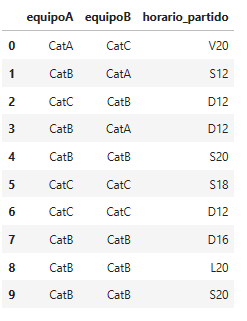

El cuál una vez evaluado figurará tal que así:

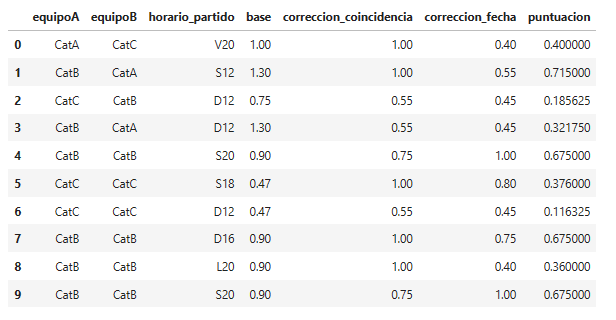

Respuesta

In [30]:
slots= {
    'V20': .4,

    'S12': .55,
    'S16': .7,
    'S18': .8,
    'S20': 1,

    'D12': .45,
    'D16': .75,
    'D18': .85,
    'D20': 1,

    'L20': .4
}

n_coincidencias= {
                    0: 0,
                    1: .25,
                    2: .45,
                    3: .6,
                    4: .7,
                    5: .75,
                    6: .78,
                    7: .8,
                    8: .8,
                    9: .85,
                    10: .85
}
n_equipos= {'CatA': 3, 'CatB': 11, 'CatC': 6}

puntuaciones= {'CatA': {'CatA': 2, 'CatB': 1.3, 'CatC': 1},
              'CatB': {'CatA': 1.3, 'CatB': .9, 'CatC': .75},
              'CatC': {'CatA': 1, 'CatB': .75, 'CatC': .47},
              }



Según el modelo para el espacio de soluciones<br>
(*)¿Cual es la función objetivo?

(*)¿Es un problema de maximización o minimización?

Respuesta:

(*)¿Cual es la función objetivo?

> La función a optimizar es la siguiente:
$Audiencia_t= \sum^{N}_{n=1} base(equipo1i, equipo2i) \times ponderacion \times correccion\_coincidencia$

> Donde:
> - base es la audiencia asociada al partido i en función de la combinación del equipo 1 y del equipo 2
> - N es el número total de partidos totales, que asciende a 10
> - ponderacion es la corrección en base al horario del partido
> - correccion_coincidencia es la correción en función del número de partidos que coinciden simultáneamente

(*)¿Es un problema de maximización o minimización?

> Se trata de un problema de maximización, en el que se busca maximizar la audiencia

Diseña un algoritmo para resolver el problema por fuerza bruta

En lugar de un algoritmo de fuerza bruta, se ha implantado un algoritmo de búsqueda aleatoria al encajar mejor con la complejidad del algoritmo, como se puede observar, nos da una mejor puntuación de 4,85 millones:

Respuesta

In [38]:
import pandas as pd
import random
import time
import numpy as np



def genera_aleatoria(slots, n_equipos):
    """
    Genera un horario aleatorio de partidos con sus puntuaciones asociadas.

    Args:
        slots (dict): Diccionario que contiene los horarios disponibles y sus pesos.
        n_coincidencias (dict): Diccionario que contiene el número de coincidencias y sus pesos correspondientes.
        n_equipos (dict): Diccionario que especifica el número de equipos en cada categoría.
        puntuaciones (dict): Diccionario que contiene las puntuaciones para las diferentes categorías de equipos.

    Returns:
        df (DataFrame): DataFrame que contiene los partidos generados, los horarios, las puntuaciones base y las correcciones.
        puntuacion (float): Puntuación total calculada a partir de los partidos generados.
    """

    n_equipos_c= n_equipos.copy()
    sol= []
    num_partidos= sum(list(n_equipos_c.values()))
    # loop para rellenar los partidos y los horarios
    i= 0
    while sum(list(n_equipos_c.values())) != 0:
        equipo_1_i= random.randint(0, len(n_equipos_c) - 1)
        equipo_1_name_i= list(n_equipos_c.keys())[equipo_1_i]
        n_equipos_c[list(n_equipos_c.keys())[equipo_1_i]]-= 1
        if n_equipos_c[list(n_equipos_c.keys())[equipo_1_i]]== 0:
            n_equipos_c.pop(list(n_equipos_c.keys())[equipo_1_i])

        equipo_2_i= random.randint(0, len(n_equipos_c) - 1)
        equipo_2_name_i= list(n_equipos_c.keys())[equipo_2_i]

        n_equipos_c[list(n_equipos_c.keys())[equipo_2_i]]-= 1
        if n_equipos_c[list(n_equipos_c.keys())[equipo_2_i]]== 0:
            n_equipos_c.pop(list(n_equipos_c.keys())[equipo_2_i])
        # generamos un horario aleatorio:
        horario_i= list(slots.keys())[random.randint(0, len(slots) - 1)]
        sol.append([equipo_1_name_i, equipo_2_name_i, horario_i])

        i+= 1
    # Rellenamos el dataframe al salir del loop:
    df= pd.DataFrame(data= sol, columns= ['equipoA', 'equipoB', 'horario_partido'])

    #nos aseguramos que haya partido tanto el lunes como el viernes:
    if 'L20' not in df['horario_partido'].values and 'V20' not in df['horario_partido'].values:
        pos_L= random.randint(0, len(df) - 1)
        df.loc[pos_L, 'horario_partido']= 'L20'
        pos_V= random.choice([i for i in range(0, len(df) - 1) if i != pos_L])
        df.loc[pos_V, 'horario_partido']= 'V20'
    elif 'L20' not in df['horario_partido'].values:
        pos_L= random.randint(0, len(df) - 1)
        df.loc[pos_L, 'horario_partido']= 'L20'
    elif 'V20' not in df['horario_partido'].values:
        pos_V= random.randint(0, len(df) - 1)
        df.loc[pos_V, 'horario_partido']= 'V20'

    return df

def obtener_puntacion(df, n_coincidencias, puntuaciones, slots):
    df.dropna(inplace= True)
    df['base']= df[['equipoA', 'equipoB']].apply(lambda x: puntuaciones[x['equipoA']][x['equipoB']], axis= 1)
    df['correccion_coincidencia']= df['horario_partido'].apply(lambda x: 1 - n_coincidencias[df['horario_partido'].value_counts().loc[x] - 1])
    df['correccion_fecha']= df['horario_partido'].apply(lambda x: slots[x])

    df['puntuacion']= df['base'] * df['correccion_coincidencia'] * df['correccion_fecha'].round(2)
    return df, df['puntuacion'].sum()


mejorsol= genera_aleatoria(slots, n_equipos)
mejorsol, mejor_puntuacion= obtener_puntacion(mejorsol, n_coincidencias, puntuaciones, slots)
t_ini= time.time()

while time.time() - t_ini < 15:
  sol= genera_aleatoria(slots, n_equipos)
  sol, puntuacion= obtener_puntacion(sol, n_coincidencias, puntuaciones, slots)
  if puntuacion > mejor_puntuacion:
    mejorsol= sol
    mejor_puntuacion= puntuacion


print('Solución: \n', sol, '\n\npuntuación: ', puntuacion)

Solución: 
   equipoA equipoB horario_partido  base  correccion_coincidencia  \
0    CatB    CatA             V20  1.30                     0.55   
1    CatA    CatA             S16  2.00                     1.00   
2    CatB    CatC             D12  0.75                     1.00   
3    CatB    CatB             L20  0.90                     1.00   
4    CatB    CatB             V20  0.90                     0.55   
5    CatC    CatB             V20  0.75                     0.55   
6    CatB    CatB             D18  0.90                     0.75   
7    CatC    CatB             D16  0.75                     1.00   
8    CatC    CatC             D20  0.47                     1.00   
9    CatB    CatC             D18  0.75                     0.75   

   correccion_fecha  puntuacion  
0              0.40    0.286000  
1              0.70    1.400000  
2              0.45    0.337500  
3              0.40    0.360000  
4              0.40    0.198000  
5              0.40    0.165000  
6

Calcula la complejidad del algoritmo por fuerza bruta

Respuesta

> La complejidad del algoritmo por fuerzas bruta es $N^{\frac{P!}{(P-2)!}}$, donde N es el número de horarios diferentes y P es el número de partidos

(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Respuesta

In [39]:
# a continuación se muestra una búsqueda local greedy, la cuál se ha demostrado que mejora sustancialmente la fuerza
# bruta y permite alcanzar una audiencia de unos 6.76 millones de espectadores:
def greedy_local_search(df, column):
    df.dropna(inplace= True)
    vals= list(df[column].values)
    mejor_puntuacion= 0
    optima= df
    df_i= df

    for i in range(1, len(df) - 1):
        for j in range(i + 1, len(df)):
            vecina= vals[:i] + [vals[j]] + vals[i+1:j] + [vals[i]] + vals[j+1:]
            df_i[column]= vecina
            sol, puntuacion= obtener_puntacion(df_i, n_coincidencias, puntuaciones, slots)
            if puntuacion > mejor_puntuacion:
                    mejor_puntuacion= puntuacion
                    optima= sol
    return optima, mejor_puntuacion

t_ini= time.time()
optimo, mejor_puntuacion= 0, 0
while time.time() - t_ini <  15:
    sol= genera_aleatoria(slots, n_equipos)
    optimo_local_iter_eqA, puntuacion= greedy_local_search(sol, 'equipoA')

    optimo_local_iter_eqB, puntuacion= greedy_local_search(optimo_local_iter_eqA, 'equipoB')

    optimo_local_iter_horario, puntuacion= greedy_local_search(optimo_local_iter_eqB, 'horario_partido')

    if puntuacion > mejor_puntuacion:
        mejor_puntuacion= puntuacion
        optimo= optimo_local_iter_horario
        print('\n')
        print(f'##### Actualización de la solución, nueva mejor puntuacion {round(mejor_puntuacion, 2)} mill audiencia \n tiempo de cálculo {round(time.time() - t_ini, 2)}s')
print("Mejor puntuación y resultados óptimos tras 3min: ")
mejor_puntuacion, optimo



##### Actualización de la solución, nueva mejor puntuacion 6.62 mill audiencia 
 tiempo de cálculo 0.9s
Mejor puntuación y resultados óptimos tras 3min: 


(6.621625,
   equipoA equipoB horario_partido  base  correccion_coincidencia  \
 0    CatA    CatA             D20  2.00                     1.00   
 1    CatA    CatC             S20  1.00                     1.00   
 2    CatB    CatB             S18  0.90                     1.00   
 3    CatC    CatC             L20  0.47                     1.00   
 4    CatB    CatB             S12  0.90                     0.75   
 5    CatB    CatC             S12  0.75                     0.75   
 6    CatC    CatC             D12  0.47                     1.00   
 7    CatB    CatB             D16  0.90                     1.00   
 8    CatB    CatB             D18  0.90                     1.00   
 9    CatB    CatB             V20  0.90                     1.00   
 
    correccion_fecha  puntuacion  
 0              1.00    2.000000  
 1              1.00    1.000000  
 2              0.80    0.720000  
 3              0.40    0.188000  
 4              0.55    0.371250  
 5              0.

(*)Calcula la complejidad del algoritmo

Respuesta

La complejidad del algoritmo

In [ ]:
# En este caso la complejidad del algoritmo es i, siendo i el número de iteraciones Greedy a efectuar

Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Respuesta

In [ ]:
# en la función mostrada anteriormente se generó una función para producir soluciones aleatorias:

def genera_aleatoria(slots, n_equipos):
    """
    Genera un horario aleatorio de partidos con sus puntuaciones asociadas.

    Args:
        slots (dict): Diccionario que contiene los horarios disponibles y sus pesos.
        n_coincidencias (dict): Diccionario que contiene el número de coincidencias y sus pesos correspondientes.
        n_equipos (dict): Diccionario que especifica el número de equipos en cada categoría.
        puntuaciones (dict): Diccionario que contiene las puntuaciones para las diferentes categorías de equipos.

    Returns:
        df (DataFrame): DataFrame que contiene los partidos generados, los horarios, las puntuaciones base y las correcciones.
        puntuacion (float): Puntuación total calculada a partir de los partidos generados.
    """

    n_equipos_c= n_equipos.copy()
    sol= []
    num_partidos= sum(list(n_equipos_c.values()))
    # loop para rellenar los partidos y los horarios
    i= 0
    while sum(list(n_equipos_c.values())) != 0:
        equipo_1_i= random.randint(0, len(n_equipos_c) - 1)
        equipo_1_name_i= list(n_equipos_c.keys())[equipo_1_i]
        n_equipos_c[list(n_equipos_c.keys())[equipo_1_i]]-= 1
        if n_equipos_c[list(n_equipos_c.keys())[equipo_1_i]]== 0:
            n_equipos_c.pop(list(n_equipos_c.keys())[equipo_1_i])

        equipo_2_i= random.randint(0, len(n_equipos_c) - 1)
        equipo_2_name_i= list(n_equipos_c.keys())[equipo_2_i]

        n_equipos_c[list(n_equipos_c.keys())[equipo_2_i]]-= 1
        if n_equipos_c[list(n_equipos_c.keys())[equipo_2_i]]== 0:
            n_equipos_c.pop(list(n_equipos_c.keys())[equipo_2_i])
        # generamos un horario aleatorio:
        horario_i= list(slots.keys())[random.randint(0, len(slots) - 1)]
        sol.append([equipo_1_name_i, equipo_2_name_i, horario_i])

        i+= 1
    # Rellenamos el dataframe al salir del loop:
    df= pd.DataFrame(data= sol, columns= ['equipoA', 'equipoB', 'horario_partido'])

    #nos aseguramos que haya partido tanto el lunes como el viernes:
    if 'L20' not in df['horario_partido'].values and 'V20' not in df['horario_partido'].values:
        pos_L= random.randint(0, len(df) - 1)
        df.loc[pos_L, 'horario_partido']= 'L20'
        pos_V= random.choice([i for i in range(0, len(df) - 1) if i != pos_L])
        df.loc[pos_V, 'horario_partido']= 'V20'
    elif 'L20' not in df['horario_partido'].values:
        pos_L= random.randint(0, len(df) - 1)
        df.loc[pos_L, 'horario_partido']= 'L20'
    elif 'V20' not in df['horario_partido'].values:
        pos_V= random.randint(0, len(df) - 1)
        df.loc[pos_V, 'horario_partido']= 'V20'

    return df


Aplica el algoritmo al juego de datos generado

Respuesta

In [ ]:
while True:
  df= genera_aleatoria(slots, n_equipos)
  print(df)

Se han truncado las últimas 5000 líneas del flujo de salida.
5    CatB    CatB             D12
6    CatB    CatC             D12
7    CatC    CatC             S12
8    CatB    CatB             D12
9    CatC    CatB             D18
  equipoA equipoB horario_partido
0    CatC    CatA             D12
1    CatC    CatC             S20
2    CatB    CatC             L20
3    CatC    CatA             V20
4    CatB    CatC             S18
5    CatA    CatB             S16
6    CatB    CatB             D18
7    CatB    CatB             D16
8    CatB    CatB             S20
9    CatB    CatB             S16
  equipoA equipoB horario_partido
0    CatC    CatB             S16
1    CatC    CatC             L20
2    CatB    CatC             D18
3    CatB    CatC             D20
4    CatB    CatA             D20
5    CatA    CatA             S12
6    CatC    CatB             S16
7    CatB    CatB             V20
8    CatB    CatB             D18
9    CatB    CatB             S16
  equipoA equipoB hor

KeyboardInterrupt: ignored

Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

> Como referencia, las prácticas y diapositivas de la asignatura, que han sido empleadas como material de apoyo para la realización del trabajo

Respuesta

Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

> De modo adicional, se ha implantado una función para poder resolver el problema mediante el algoritmo GRASP, ver apartado 4. del notebook con el código del trabajo adjunto. Mediante este método se consigue superar los siete millones de espectadores de

> De modo adicional, se ha considerado de gran interes implantar un algoritmo genético para su resolución, sin embargo, por limitaciones de tiempo finalmente se decidió descartar esta opción.

> Remarcar que tal y como está actualmente planteado el problema se puede variar cualquier parámetro de entrada tal y como puntuaciones, número de equipos de cada categoría, penalizaciones en función de coincidencias, etc.